**Krupali Mehta(CE076)**

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from subprocess import call
import sklearn.metrics as metrics

In [21]:
data = datasets.load_wine()
dataset = pd.DataFrame(data.data, columns = data.feature_names)
print(f'Examples : {dataset.shape[0]}  and  Features : {dataset.shape[1]}')

print("features :- ",data.feature_names)
print("Labels :- ",data.target_names)

Examples : 178  and  Features : 13
features :-  ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Labels :-  ['class_0' 'class_1' 'class_2']


In [22]:
x_train, x_test, y_train, y_test = train_test_split(data.data,data.target,test_size=0.20,random_state = 76)

In [23]:
dtc = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes = 10)
dtc.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
#Testing
y_pred = dtc.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Score  :  ', accuracy)

conf_matrix = confusion_matrix  (y_test, y_pred)
print('\nConfusion matrix  :  \n', conf_matrix)

precision = precision_score(y_test, y_pred, average = None)
print('\nPrecision Score  :  ', precision)

recall  = recall_score(y_test, y_pred, average = None)
print('\nRecall Score  :  ', recall)

Accuracy Score  :   0.9166666666666666

Confusion matrix  :  
 [[13  1  0]
 [ 1 11  1]
 [ 0  0  9]]

Precision Score  :   [0.92857143 0.91666667 0.9       ]

Recall Score  :   [0.92857143 0.84615385 1.        ]


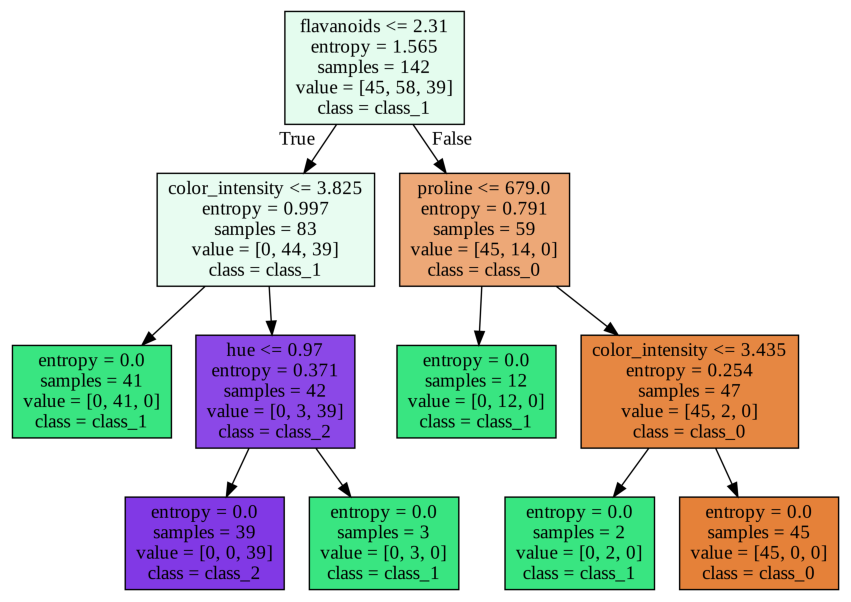

In [25]:
export_graphviz(dtc, out_file = 'wine_tree.dot', 
                feature_names = list(data.feature_names), 
                class_names = list(data.target_names), 
                filled = True)  

# Convert to png
call(['dot', '-Tpng', 'wine_tree.dot', '-o', 'wine_tree.png', '-Gdpi=600'])
plt.figure(figsize = (15, 20))
plt.imshow(plt.imread('wine_tree.png'))
plt.axis('off')
plt.show()

In [26]:
#Task 2: Apply algorithm on digits dataset - LabelEncoding of features: and Train test Division 80%-20%
digits = datasets.load_digits()
print(digits)

print("\n================================\n")
print(digits.data.shape)
print(digits.target.shape)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

In [27]:
x = digits.data
y = digits.target

#splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 76)

#creating a decision tree classifier using gini
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 76, max_depth = 7, min_samples_leaf = 26)
classifier.fit(x_train, y_train)

#predicting classes of test data
y_pred = classifier.predict(x_test)
print('Predicted values  :  \n')
print(y_pred)

Predicted values  :  

[5 7 7 0 8 5 5 2 1 2 5 2 3 6 4 3 4 5 5 2 2 5 7 4 1 9 0 8 7 6 1 3 1 4 3 6 3
 6 0 6 1 6 2 6 8 9 9 1 4 6 3 3 3 0 7 9 5 1 9 6 7 2 5 0 2 7 8 3 1 1 7 1 8 7
 3 1 1 6 0 1 7 7 6 9 3 9 4 8 1 6 3 8 4 6 5 5 1 6 1 2 2 1 5 4 4 0 0 0 0 3 7
 0 7 9 1 5 0 7 1 2 8 6 9 2 0 1 9 0 0 0 4 9 1 8 7 6 9 1 0 0 6 7 2 7 6 8 7 3
 7 7 6 3 4 6 0 7 5 1 7 0 5 9 5 7 0 4 2 4 7 3 2 3 9 6 2 0 3 4 6 2 5 3 5 1 7
 8 1 8 1 8 3 5 3 9 7 9 0 4 3 3 0 9 0 6 6 6 2 6 1 4 7 3 6 7 8 5 3 8 8 0 5 6
 1 6 8 2 1 4 1 5 7 3 5 9 3 8 1 3 7 5 0 8 5 6 9 8 1 1 6 0 4 7 5 3 1 8 8 2 4
 6 1 5 2 1 4 2 0 4 7 4 3 3 5 5 4 2 7 0 0 7 6 0 0 7 1 9 4 7 4 3 3 4 7 4 1 1
 9 7 5 8 2 2 8 3 1 8 1 6 3 5 4 2 3 2 4 8 7 6 0 3 4 8 6 6 3 9 4 0 2 3 0 9 9
 1 4 2 2 6 4 7 1 0 7 4 4 6 8 0 8 5 2 1 7 3 3 2 9 2 0 5]


In [31]:
#model accuracy

print('confusion matrix :  \n',metrics.confusion_matrix(y_test, y_pred))
print('\nAccuracy :  ',metrics.accuracy_score(y_test, y_pred))
print('\nReport :  ',metrics.classification_report(y_test, y_pred))

confusion matrix :  
 [[34  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  2  2  0  0  0  0  3]
 [ 1  1 24  1  1  0  1  1  0  0]
 [ 0  2  1 30  0  0  0  2  2  0]
 [ 1  4  1  0 29  0  0  2  0  0]
 [ 1  1  1  2  0 32  1  0  0  2]
 [ 0  1  0  0  3  0 37  0  0  0]
 [ 0  3  1  0  0  0  0 33  1  0]
 [ 1  4  3  0  0  0  0  1 24  0]
 [ 1  1  1  6  0  1  0  3  2 20]]

Accuracy :   0.8055555555555556

Report :                 precision    recall  f1-score   support

           0       0.87      1.00      0.93        34
           1       0.61      0.77      0.68        35
           2       0.73      0.80      0.76        30
           3       0.73      0.81      0.77        37
           4       0.83      0.78      0.81        37
           5       0.97      0.80      0.88        40
           6       0.95      0.90      0.92        41
           7       0.79      0.87      0.82        38
           8       0.83      0.73      0.77        33
           9       0.80      0.57      0.67        35

    ac

Confusion Matrix  :  
[[34  0  0  0  0  0  0  0  0  0]
 [ 0 27  1  2  2  0  0  0  0  3]
 [ 1  1 24  1  1  0  1  1  0  0]
 [ 0  2  1 30  0  0  0  2  2  0]
 [ 1  4  1  0 29  0  0  2  0  0]
 [ 1  1  1  2  0 32  1  0  0  2]
 [ 0  1  0  0  3  0 37  0  0  0]
 [ 0  3  1  0  0  0  0 33  1  0]
 [ 1  4  3  0  0  0  0  1 24  0]
 [ 1  1  1  6  0  1  0  3  2 20]]


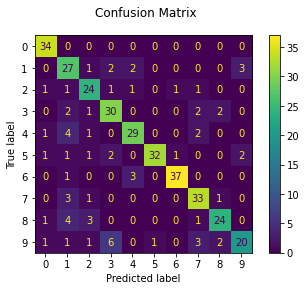

In [32]:
display = metrics.plot_confusion_matrix(classifier, x_test, y_test)
display.figure_.suptitle('Confusion Matrix')
print(f'Confusion Matrix  :  \n{display.confusion_matrix}')

plt.show()